# Principal Components Analysis (PCA)

PCA is something everyone needs to know about (if they're going to analyze data). 

In [92]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from loadMNIST import LoadMNIST
%matplotlib inline

Suppose we have a dataset consistent of $N$ $2$-dimensional observations. We'll call the $i^{th}$ observation $\mathbf{x}_i = \left (x_{i1}, x_{i2} \right )$. The first and second dimension of each data-point could be anything: heat and pressure, weight and height, two different frequencies, etc. Since we're not committed to any particular set of measurements, we'll generate a couple of datasets by sampling from a random distribution.

In [ ]:
##the number of datapoints
N = 1000

In [55]:
##our first dataset. 
cov_ind = np.eye(2)
X_ind = np.random.multivariate_normal(np.zeros((2)), cov_ind, N)
print 'number of samples: %d' %(X_ind.shape[0])
print 'number of dimensions: %d' %(X_ind.shape[1])

number of samples: 1000
number of dimensions: 2


In [42]:
##our second dataset
cor = 0.99
cov_cor = np.eye(2)
cov_cor[0,1] = cor
cov_cor[1,0] = cor
X_cor = np.random.multivariate_normal(np.zeros((2)), cov_cor, N)

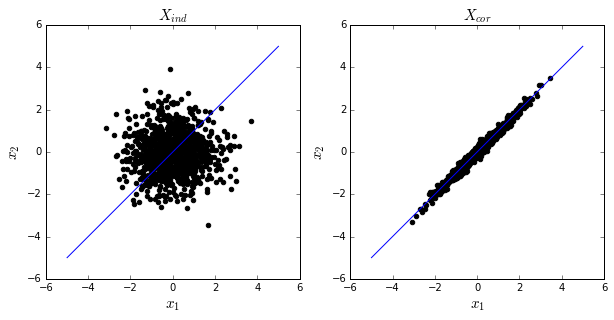

In [86]:
##plot the two datasets
fig = plt.figure(figsize=(10,10))
fsize = {'fontsize':15}
lp = 5

ax = fig.add_subplot(121, aspect='equal')

plt.scatter(X_ind[:,0], X_ind[:,1], c='k')
plt.plot(np.linspace(-lp, lp,2),np.linspace(-lp, lp,2))

plt.title('$X_{ind}$',fsize)
plt.xlabel('$x_1$',fsize)
plt.ylabel('$x_2$',fsize)

ax = fig.add_subplot(122, aspect='equal')
plt.scatter(X_cor[:,0], X_cor[:,1], c='k')
plt.plot(np.linspace(-lp, lp,2),np.linspace(-lp, lp,2))

plt.title('$X_{cor}$',fsize)
plt.xlabel('$x_1$',fsize)
plt.ylabel('$x_2$',fsize)


The datasets above are importantly different. On the left the dimensions of the datapoints are completely independent. On the right they are highly correlated. In fact, $x_1$ and $x_2$ are so tightly correlated it's almost as if they correspond to same measurement. This suggests that we could cut the size of our dataset in half without losing much information. We can formalize this intution using principle components analyis. Let's run PCA on $X_{cor}$ dataset and then analyze the outputs piece by piece.

In [51]:
##instantiate a PCA i+nstance
X_cor_PCA = PCA()

In [52]:
##run PCA on X_cor
X_cor_PCA.fit(X_cor)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

So that was easy. Notice that the data going into the "fit" method should organized like $\left (number~of~samples, number~of~dimensions \right ) $. The first thing we'll look at are the Principal Components (PCs). The PCs are vectors. Each PC vector has the same number of dimensions as the data (in this case, $2$). The PC vectors are going to be stored in a "components" matrix. Each row is a principal component vector. In many (but not all) cases, the number of PCs (number of rows in the "components" matrix) will be equal to the number of dimensions of the data. So we should expect that the "components" matrix in our example will have shape $(2,2)$.

In [59]:
PCs = X_cor_PCA.components_

Okay, so the PCs have the right dimensions, but we still have to explain what the hell they are. We can get a quick and intuitive answer by plotting them on top of the $X_{cor}$ data.

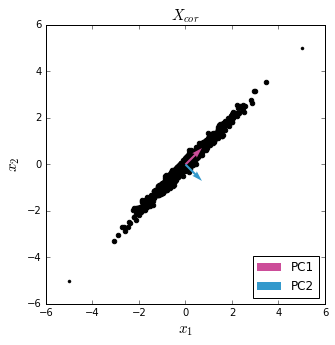

In [88]:
##configure the plot
fig = plt.figure(figsize=(5,5))
fsize = {'fontsize':15}
PC1_color = np.array([.8,.3,.6])  ##pink vector
PC2_color = np.array([.2,.6,.8])  ##blue vector
ax = fig.add_subplot(111, aspect='equal')
lp = 5

##plot the data
plt.scatter(X_cor[:,0], X_cor[:,1], c='k')
plt.plot(np.linspace(-lp, lp,2),np.linspace(-lp, lp,2),'k.')

##now overlay the 1st PC vector...
plt.quiver(PCs[0,0],PCs[0,1],angles='xy', scale_units ='xy',scale=1,color=PC1_color, label='PC1')

##...and the 2st PC vector
plt.quiver(PCs[1,0],PCs[1,1],angles='xy', scale_units ='xy',scale=1,color=PC2_color, label='PC2')



plt.title('$X_{cor}$',fsize)
plt.xlabel('$x_1$',fsize)
plt.ylabel('$x_2$',fsize)
plt.legend(loc='lower right')

We notice a few things about the PCs. First, they are perpendicular to each to each other. Second, they each have unit length. If we call the PCs $\mathbf{u}_1$ and $\mathbf{u}_2$, then we can express these properties mathematically by saying that $||\mathbf{u}_1|| = ||\mathbf{u}_2|| = 1$, and $\mathbf{u}_1 \cdot \mathbf{u}_2 = 0$. 

Third, we notice that the first PC is aligned with the data in a very natural way. Specifically, it is aligned to the direction of $\textit{greatest variance}$. In order to formalize this property, we have to think critically about the way we plot and represent data. When we say that each of our data points is $2$-dimensional, we are saying that as far as we know, $x_1$ and $x_2$ are measuring two different things (we gave examples of $things$ above). After plotting the data we might discover that these two different things have a strong relationship to one another, but we did not start off assuming that. We represent this assumption geometrically by plotting the things along orthogonal axes. We do this because in mathematical and geometric terms, orthogonality = " as far as we know these things have nothing to do with each other".

To formalize this idea, we have to actually write down the axes we were implicitly using when we first plotted data. Let's call them $\mathbf{a}_1$ and $\mathbf{a}_2$. Now these axes should be defined in such a way that they don't alter our measurements in any way. This means we want axes such that $\mathbf{x} \cdot \mathbf{a}_1 = x_1$, and $\mathbf{x} \cdot \mathbf{a}_2 = x_2$. The obvious choice is $\mathbf{a}_1 = (1,0)$ and $\mathbf{a}_2 = (0,1)$. It's easy to show that $\mathbf{a}_1 \cdot \mathbf{a}_2 = 0$, and the $||\mathbf{a}_1|| = ||\mathbf{a}_2|| = 1$. Thus we see that the PC vectors have the same properties of orthogonality and unit length as the axes that we implicitly chose when first plotting our data. Thus we now have two different ways of plotting our data. We can plot the data using the default axes $\mathbf{a}_1$ and $\mathbf{a}_2$, or we can plot the data using the new axes $\mathbf{u}_1$, $\mathbf{u}_2$. To do this, we simply project each data point onto the different axes: \\  

#### Data expressed using default axes, $X_{default}$:

$$\mathbf{x}_{default} = \left ( \mathbf{x} \cdot \mathbf{a}_1, \mathbf{x} \cdot \mathbf{a}_2 \right )$$

#### Data expressed using PC vectors as axes, $X_{PCs}$:

$$\mathbf{x}_{PCs} = \left ( \mathbf{x} \cdot \mathbf{u}_1, \mathbf{x} \cdot \mathbf{u}_2 \right )$$


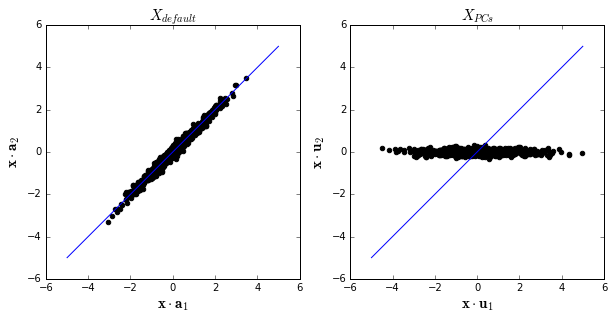

In [89]:
##plot using the default axes
##configure the plot
fig = plt.figure(figsize=(10,10))
fsize = {'fontsize':15}
PC1_color = np.array([.8,.3,.6])  ##pink vector
PC2_color = np.array([.2,.6,.8])  ##blue vector
lp = 5


##define the default axes
A = np.array([[1,0],[0,1]])
X_default = X_cor.dot(A)

##plot the data using default axes
ax = fig.add_subplot(121, aspect='equal')
plt.scatter(X_default[:,0], X_default[:,1], c='k')
plt.plot(np.linspace(-lp, lp,2),np.linspace(-lp, lp,2))
plt.title('$X_{default}$',fsize)
plt.xlabel('$\mathbf{x} \cdot \mathbf{a}_1$',fsize)
plt.ylabel('$\mathbf{x} \cdot \mathbf{a}_2$',fsize)


##express the data in PC-space
X_pcs = X_cor.dot(PCs.T)
ax = fig.add_subplot(122, aspect='equal')

##plot the data using PC vectors as axes
ax = fig.add_subplot(122, aspect='equal')
plt.scatter(X_pcs[:,0], X_pcs[:,1], c='k')
plt.plot(np.linspace(-lp, lp,2),np.linspace(-lp, lp,2))
plt.title('$X_{PCs}$',fsize)
plt.xlabel('$\mathbf{x} \cdot \mathbf{u}_1$',fsize)
plt.ylabel('$\mathbf{x} \cdot \mathbf{u}_2$',fsize)


On the left we have the $X_{cor}$ dataset plotted using the default axes. It looks exactly the same as it always has, just as we expect it should. On the right we have the same data plotted using the PC vectors as axes. This shows very clearly what already intuited: that this dataset really only consists of a single "principal" dimension. There is some noise in the second dimension, but most of the variance is along the first dimension, and this dimension is captured by the first principal component. This brings us to the fourth important property of principal components: they are $ranked$. The first PC accounts for most of the variance. The second PC accounts for less, and so on. In fact, the PCA analysis will tell us the amount of variance accounted for by each PC

In [91]:
expl_var = X_cor_PCA.explained_variance_
print expl_var/np.sum(expl_var)

[ 0.99534685  0.00465315]


Thus, the first component in this simple illustration accounts for more than $99$% of the variance. So in this case, we would be justified performing all future analyses on just this one dimension of the data, effectively cutting amount of data in half. Our data points would now be housed in an $(N,1)$ array instead of an $(N,2)$ matrix:

$X_{1D} = \left ( \mathbf{x}_1 \cdot \mathbf{u}_1, \ldots, \mathbf{x}_N \cdot \mathbf{u}_1 \right)$.

To review, we've discovered that PC vectors are actually $axes$. They have the same properties of orthogonality and unit length as the default axes we implicitly assume when we plot our data points. Importantly, these PC axes are ranked according to how much variance they account for. This means we can reduce, compress or otherwise simplify our dataset by running PCA on it, expressing our data in terms of the PCs (using the dot product), and then throwing away the PCs that account for very little of the variance. 

Now let's try PCA on an interesting, non-made-up dataset. We'll apply it to the MNIST digit images. Remember that images are just long vectors that happen to look like something if we plot the elements just right. So lets apply PCA to the vectors that depict 1's, 3's, 7's, and 8's.

In [139]:
##load all MNIST images, then select out the 0 and 1 images

mnist_trn_img = '/mnt/fast/MNIST/train-images-idx3-ubyte'
mnist_trn_lab = '/mnt/fast/MNIST/train-labels-idx1-ubyte'

mnist_trn_data = LoadMNIST(mnist_trn_img)
mnist_trn_label = LoadMNIST(mnist_trn_lab)

>u1
(60000, 28, 28)
>u1
(60000,)


In [142]:
select_these_digits = [1, 3, 7, 8]
idx = map(lambda x: x in select_these_digits, mnist_trn_label)

digits = mnist_trn_data[np.where(idx)].astype('float32')
n_digits = digits.shape[0]
pixel_res = digits.shape[1]
print 'number of digits: %d' %(n_digits)
print 'pixels: %d' %(pixel_res**2)

TypeError: only integer arrays with one element can be converted to an index

In [117]:
##normalize images
##note the use of np.newaxis to take advantage of broadcasting rules!
digits -= np.mean(digits,axis=(1,2))[:,np.newaxis,np.newaxis]  
digits /= np.sqrt(np.sum(digits**2,axis=(1,2)))[:,np.newaxis,np.newaxis]

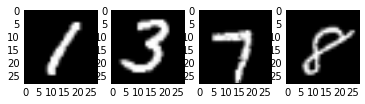

In [118]:
##sanity check 4 random images
plt.subplot(1,4,1)
plt.imshow(digits[0],cmap='gray')
plt.subplot(1,4,2)
plt.imshow(digits[100],cmap='gray')
plt.subplot(1,4,3)
plt.imshow(digits[20000],cmap='gray')
plt.subplot(1,4,4)
plt.imshow(digits[-1],cmap='gray')




In [156]:
##reformat the data in an N x 28**2 matrix of vectors
##first, we reshape the templates and stack them into a matrix
digits = digits.reshape((n_digits,pixel_res**2))
digits.shape

(24989, 784)

In [157]:
##this took about 1 second on my desktop
digits_PCA = PCA()
digits_PCA.fit(digits)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

So we've just performed PCA on our digit data set. Since the PC vectors have the same dimensions as the data points, and the data points are images, we can treat each PC vector as an image and look at it. Here are the first four:

In [158]:
d_pcs = digits_PCA.components_


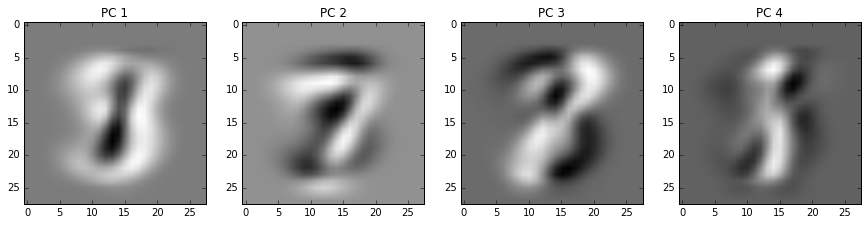

In [159]:
n_pics = 4
fig = plt.figure(figsize = (15,15))
for ii in range(n_pics):
    plt.subplot(1,n_pics,ii+1)
    plt.imshow(d_pcs[ii].reshape(pixel_res, pixel_res),cmap='gray')
    plt.title('PC %d' %(ii+1))


None of the PCs look like any one of the digits, although each of the PCs look a little bit like all of the digits at once. The first PC is intutive because there is a straight line down the middle, which expresses what 1's and 7's have in common, and roundish halo around the straight line, which expresses what 3's and 8's have in common. Importantly, the 1-like feature is dark, while the roundy 3-like feature is bright, meaning that they are on opposite ends of the axis. This suggests that 1's and 7's will cluster at the left end of PC1, while 3's and 8's will cluster at the right end. Let's check this.

In [160]:
pc1_proj = digits.dot(d_pcs[0].T)

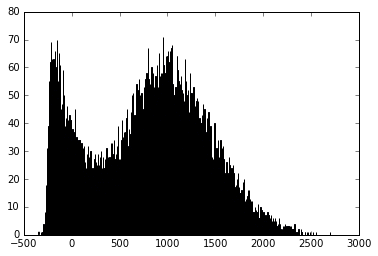

In [161]:
_=plt.hist(pc1_proj, 1000)

It would be awesome if we could eliminate some of the $28**2$ dimensions in our dataset. To see how much we can get away with eliminating, let's plot the variance explained by each PC:

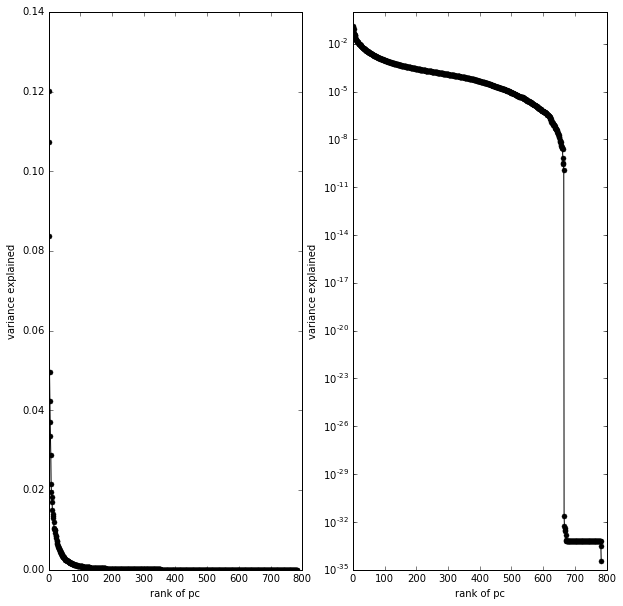

In [162]:
fig = plt.figure(figsize = (10,10))
d_var_expl = digits_PCA.explained_variance_
plt.subplot(121)
plt.plot(d_var_expl/np.sum(d_var_expl),'k.', markersize = 10)
plt.plot(d_var_expl/np.sum(d_var_expl),'k')
plt.xlabel('rank of pc')
plt.ylabel('variance explained')
plt.subplot(122)
plt.semilogy(d_var_expl/np.sum(d_var_expl),'k.', markersize = 10)
plt.semilogy(d_var_expl/np.sum(d_var_expl),'k')
plt.xlabel('rank of pc')
plt.ylabel('variance explained')



These plots show the variance explained by each PC in linear (left) and in log (right) axes. There are two inflection points: one right at around 100 PCs, and another near about 650. We can directly visualize how much information we loose by reconstructing the digits using only 100 or 650 pcs. The reconstruction equation is quite simple: first we express the data in PC space, then we subselect some number of PCs, and finally we multiply each PC by the projection

#### Some digits reconstructed with 100 PCs

In [176]:
nPC = 100
sample_dx = [0,100,2000,-1]
sample_digits = digits[sample_dx]

##express images using first 100 pcs as axes
sample_proj = sample_digits.dot(d_pcs[:nPC].T)

##use the projections to reconstruct
sample_recons = sample_proj.dot(d_pcs[:nPC])

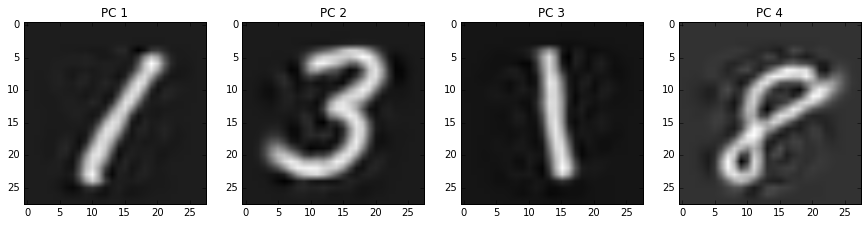

In [177]:
n_pics = len(sample_dx)
fig = plt.figure(figsize = (15,15))
for ii in range(n_pics):
    plt.subplot(1,n_pics,ii+1)
    plt.imshow(sample_recons[ii].reshape(pixel_res, pixel_res),cmap='gray')
    plt.title('PC %d' %(ii+1))


In [172]:
sample_recons.shape

(4, 784)